In [1]:
# Import the modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
% matplotlib inline

In [2]:
filename = 'winequality-red.csv'  #Download the file from https://archive.ics.uci.edu/ml/datasets/wine+quality
df = pd.read_csv(filename, sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
columns = df.columns.values

In [4]:
print(columns)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


In [5]:
X, Y = df[columns[0:-1]], df[columns[-1]]
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
Y.loc[(Y<5)]=3
Y.loc[(Y<8) & (Y>= 5 )] = 2
Y.loc[(Y>=8)] = 1
Y_new = pd.get_dummies(Y)  # One hot encode
X_train, X_test, Y_train, y_test = \
  train_test_split(X_new, Y_new, test_size=0.4, random_state=333)

/Users/am/anaconda3/envs/tensorflow/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
Y_train.describe()

,1,2,3
count,959.000000,959.000000,959.000000
mean,0.011470,0.953076,0.035454
std,0.106539,0.211586,0.185020
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [7]:
class LogisticRegressor:
    def __init__(self,d,n, lr=0.001 ):
                
        # Place holders for input-output training data
        self.X = tf.placeholder(tf.float32,\
                    shape=[None,d], name='input')
        self.Y = tf.placeholder(tf.float32,\
                    name='output')
        # Variables for weight and bias
        self.b = tf.Variable(tf.zeros(n), dtype=tf.float32)
        self.W = tf.Variable(tf.random_normal([d,n]),\
                             dtype=tf.float32)
            
        # The Linear Regression Model
        h = tf.matmul(self.X, self.W) + self.b
        self.Ypred = tf.nn.sigmoid(h)
        
        
        # Loss function
        self.loss = cost = tf.reduce_mean(-tf.reduce_sum(self.Y*tf.log(self.Ypred),\
                        reduction_indices=1), name = 'cross-entropy-loss')

        # Gradient Descent with learning 
        # rate of 0.05 to minimize loss
        optimizer = tf.train.GradientDescentOptimizer(lr)
        self.optimize = optimizer.minimize(self.loss)

        # Initializing Variables
        init_op = tf.global_variables_initializer()
        self.sess = tf.Session()
        self.sess.run(init_op)
        
    def fit(self, X, Y,epochs=500):
        total = []
        for i in range(epochs):
            _, l = self.sess.run([self.optimize,self.loss],\
                            feed_dict={self.X: X, self.Y: Y})
            total.append(l)
            if i%100==0:
                print('Epoch {0}/{1}: Loss {2}'.format(i,epochs,l))
        return total
    
    def predict(self, X):
        return self.sess.run(self.Ypred, feed_dict={self.X:X})
        
    
    def get_weights(self):
        return self.sess.run([self.W, self.b])


In [8]:
_, d = X_train.shape
_, n = Y_train.shape

model = LogisticRegressor(d,n)
loss = model.fit(np.float32(X_train), Y_train, 5000)

Epoch 0/5000: Loss 0.8243454694747925
Epoch 100/5000: Loss 0.7768917679786682
Epoch 200/5000: Loss 0.733469545841217
Epoch 300/5000: Loss 0.6937313675880432
Epoch 400/5000: Loss 0.6573486924171448
Epoch 500/5000: Loss 0.6240147352218628
Epoch 600/5000: Loss 0.5934458374977112
Epoch 700/5000: Loss 0.5653812885284424
Epoch 800/5000: Loss 0.5395837426185608
Epoch 900/5000: Loss 0.5158373713493347
Epoch 1000/5000: Loss 0.49394670128822327
Epoch 1100/5000: Loss 0.473736047744751
Epoch 1200/5000: Loss 0.4550468325614929
Epoch 1300/5000: Loss 0.43773695826530457
Epoch 1400/5000: Loss 0.42167842388153076
Epoch 1500/5000: Loss 0.40675684809684753
Epoch 1600/5000: Loss 0.39286935329437256
Epoch 1700/5000: Loss 0.37992337346076965
Epoch 1800/5000: Loss 0.3678366541862488
Epoch 1900/5000: Loss 0.35653403401374817
Epoch 2000/5000: Loss 0.3459485173225403
Epoch 2100/5000: Loss 0.3360198736190796
Epoch 2200/5000: Loss 0.32669389247894287
Epoch 2300/5000: Loss 0.31792140007019043
Epoch 2400/5000: Loss

Text(0,0.5,'Mean Square Error')

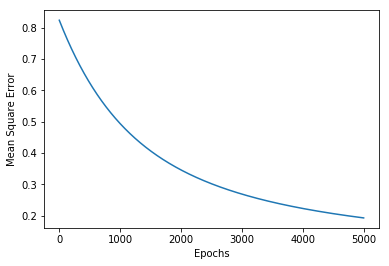

In [9]:
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")

In [10]:
Y_pred = model.predict(np.float32(X_test))

In [11]:
accuracy = sum(np.argmax(Y_pred,1) == np.argmax(np.array(y_test),1))/len(y_test)
print(accuracy)

0.94375
